本章将介绍一个通用的机器学习的项目模板，模板的创建需要6个步骤。  
1）端到端地预测（分类和回归）模型的项目结构。  
2）如何将前面学到的内容引入到项目中。  
3）如何通过这个项目模板将得到一个更加精准的模板。  
机器学习就是针对数据进行自动挖掘，找出数据的内在规律，并用这个规律来进行新数据的预测。

分离或回归模型的机器学习项目可以分为以下6个步骤：  
1）定义问题  
2）理解数据  
3）数据准备  
4）评估算法  
5）优化模型  
6）结果部署  


1）template of ml 

1.定义问题-1.1 导入类库      1.2 导入数据集  
2.理解数据-2.1 描述性统计    2.2 数据可视化  
3.数据准备-3.1 数据清洗      3.2 特征选择            3.3 数据转换   
4.评估算法-4.1 分离数据集    4.2 定义模型评估标准      4.3 算法审查  4.4 算法比较  
5.优化模型-5.1 算法调参      5.2 继承算法  
6.结果部署-6.1 预测评估数据集 6.2 利用整个数据集生成模型 6.3 序列化模型  

**1.定义问题**，主要是导入机器学习项目中所需要的类库和数据集等，以便完成机器学习的项目，包括导入python的类库，类和方法，以及导入数据。同时这也是所有的配置参数的配置模块。当数据及过大时，可以在这里对数据及进行瘦身处理。    

**2.理解数据**，这是加强对数据理解的步骤，包括通过描述性统计来分析数据和通过可视化来观测数据。  

**3.数据准备，**数据准备阶段主要是数据的预处理，以便让数据更好的展示，以及熟悉输入和输出结果的关系。  
1）删除重复数据，标记错误的数值，甚至标记错误的输入数据来清洗数据。  
2）特征选择，包括已出多余的特征属性和增加新的特征属性。  
3）数据转化，对数据尺度进行调整，或者调整数据的分布，以便更好地展示问题。  


**4.评估算法**，寻找最佳的算法子集。  
1）分离出评估数据集，以便验证模型  
2）定义模型评估标准，用来评估算法模型  
3）抽样审查线性算法和非线性算法  
4）比较算法的精确度  


**5.优化模型，**当得到一个算法精确度足够的算法列表之后，要从中找出最合适的算法，通常有两种可以提高算法的精准度：  
1）对每一种算法进行调参，得到最佳的结果  
2）使用集合算法来提高算法模型的精准度。  

**6.结果部署**，一旦认为模型的精准度足够高，就可以将这个模型序列化。以便有新数据时，使用该模型来预测数据。  
1）通过验证数据集来验证被优化过的模型。  
2）通过整个数据及来生成模型  
3）将模型序列化，以便于预测新数据。  

In [59]:
import numpy as np
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv 
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [60]:
#filename = '/Users/wangjiabin/ML_2020_summer/<ml with python practice>/cha_7_data_visibility/pima_data.csv'
filename = '/Users/wangjiabin/ML_2020_summer/<ml with python practice>/chap_11_metric_for _algorithm_evaluation/housing.csv'
#'/Users/wangjiabin/ML_2020_summer/<ml with python practice>/cha_7_data_visibility/pima_data.csv'
names =['PRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','RATATIO','B','LATAT','MEDV']
data = read_csv(filename,delim_whitespace =True,names =names)#
print(data)
print(data.shape)
print(data.dtypes)

         PRIM    ZN  INDUS  CHAS   NOX    RM   AGE   DIS  RAD    TAX  RATATIO  \
0    6.32e-03  18.0   2.31     0  0.54  6.58  65.2  4.09    1  296.0     15.3   
1    2.73e-02   0.0   7.07     0  0.47  6.42  78.9  4.97    2  242.0     17.8   
2    2.73e-02   0.0   7.07     0  0.47  7.18  61.1  4.97    2  242.0     17.8   
3    3.24e-02   0.0   2.18     0  0.46  7.00  45.8  6.06    3  222.0     18.7   
4    6.91e-02   0.0   2.18     0  0.46  7.15  54.2  6.06    3  222.0     18.7   
..        ...   ...    ...   ...   ...   ...   ...   ...  ...    ...      ...   
501  6.26e-02   0.0  11.93     0  0.57  6.59  69.1  2.48    1  273.0     21.0   
502  4.53e-02   0.0  11.93     0  0.57  6.12  76.7  2.29    1  273.0     21.0   
503  6.08e-02   0.0  11.93     0  0.57  6.98  91.0  2.17    1  273.0     21.0   
504  1.10e-01   0.0  11.93     0  0.57  6.79  89.3  2.39    1  273.0     21.0   
505  4.74e-02   0.0  11.93     0  0.57  6.03  80.8  2.50    1  273.0     21.0   

          B  LATAT  MEDV  


In [61]:
#set_option(120)
print(data.head(30))

        PRIM    ZN  INDUS  CHAS   NOX    RM    AGE   DIS  RAD    TAX  RATATIO  \
0   6.32e-03  18.0   2.31     0  0.54  6.58   65.2  4.09    1  296.0     15.3   
1   2.73e-02   0.0   7.07     0  0.47  6.42   78.9  4.97    2  242.0     17.8   
2   2.73e-02   0.0   7.07     0  0.47  7.18   61.1  4.97    2  242.0     17.8   
3   3.24e-02   0.0   2.18     0  0.46  7.00   45.8  6.06    3  222.0     18.7   
4   6.91e-02   0.0   2.18     0  0.46  7.15   54.2  6.06    3  222.0     18.7   
5   2.99e-02   0.0   2.18     0  0.46  6.43   58.7  6.06    3  222.0     18.7   
6   8.83e-02  12.5   7.87     0  0.52  6.01   66.6  5.56    5  311.0     15.2   
7   1.45e-01  12.5   7.87     0  0.52  6.17   96.1  5.95    5  311.0     15.2   
8   2.11e-01  12.5   7.87     0  0.52  5.63  100.0  6.08    5  311.0     15.2   
9   1.70e-01  12.5   7.87     0  0.52  6.00   85.9  6.59    5  311.0     15.2   
10  2.25e-01  12.5   7.87     0  0.52  6.38   94.3  6.35    5  311.0     15.2   
11  1.17e-01  12.5   7.87   

In [62]:
set_option('precision',2)
print(data.describe())

           PRIM      ZN   INDUS    CHAS     NOX      RM     AGE     DIS  \
count  5.06e+02  506.00  506.00  506.00  506.00  506.00  506.00  506.00   
mean   3.61e+00   11.36   11.14    0.07    0.55    6.28   68.57    3.80   
std    8.60e+00   23.32    6.86    0.25    0.12    0.70   28.15    2.11   
min    6.32e-03    0.00    0.46    0.00    0.39    3.56    2.90    1.13   
25%    8.20e-02    0.00    5.19    0.00    0.45    5.89   45.02    2.10   
50%    2.57e-01    0.00    9.69    0.00    0.54    6.21   77.50    3.21   
75%    3.68e+00   12.50   18.10    0.00    0.62    6.62   94.07    5.19   
max    8.90e+01  100.00   27.74    1.00    0.87    8.78  100.00   12.13   

          RAD     TAX  RATATIO       B   LATAT    MEDV  
count  506.00  506.00   506.00  506.00  506.00  506.00  
mean     9.55  408.24    18.46  356.67   12.65   22.53  
std      8.71  168.54     2.16   91.29    7.14    9.20  
min      1.00  187.00    12.60    0.32    1.73    5.00  
25%      4.00  279.00    17.40  375.38 

In [63]:
set_option('precision',2)
print(data.corr(method='pearson'))

         PRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  \
PRIM     1.00 -0.20   0.41 -5.59e-02  0.42 -0.22  0.35 -0.38  6.26e-01  0.58   
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  0.31 -0.57  0.66 -3.12e-01 -0.31   
INDUS    0.41 -0.53   1.00  6.29e-02  0.76 -0.39  0.64 -0.71  5.95e-01  0.72   
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  0.09  0.09 -0.10 -7.37e-03 -0.04   
NOX      0.42 -0.52   0.76  9.12e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67   
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  1.00 -0.24  0.21 -2.10e-01 -0.29   
AGE      0.35 -0.57   0.64  8.65e-02  0.73 -0.24  1.00 -0.75  4.56e-01  0.51   
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  0.21 -0.75  1.00 -4.95e-01 -0.53   
RAD      0.63 -0.31   0.60 -7.37e-03  0.61 -0.21  0.46 -0.49  1.00e+00  0.91   
TAX      0.58 -0.31   0.72 -3.56e-02  0.67 -0.29  0.51 -0.53  9.10e-01  1.00   
RATATIO  0.29 -0.39   0.38 -1.22e-01  0.19 -0.36  0.26 -0.23  4.65e-01  0.46   
B       -0.39  0.18  -0.36  4.88e-02 -0.

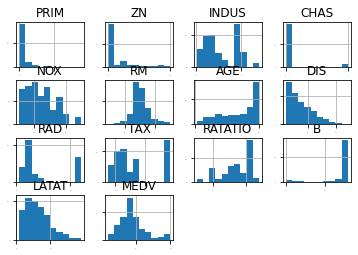

In [64]:
data.hist(sharex =False, sharey = False, xlabelsize =1, ylabelsize =1 )
pyplot.show()

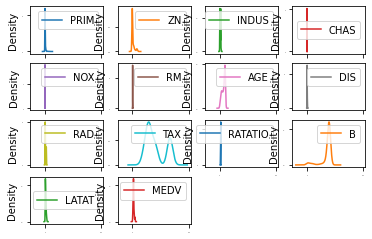

In [65]:
data.plot(kind ='density',subplots =True, layout = (4,4), sharex ='False', fontsize = 1)
pyplot.show()

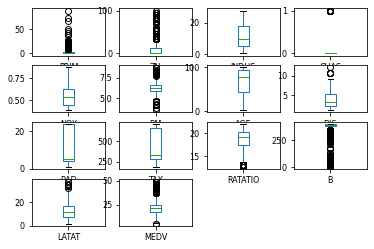

In [66]:
data.plot(kind='box',subplots=True,layout =(4,4),sharex =False, sharey= False,fontsize =8)
pyplot.show()

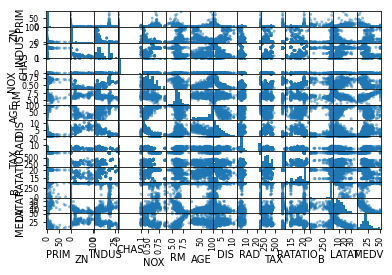

In [67]:
scatter_matrix(data)
pyplot.show()

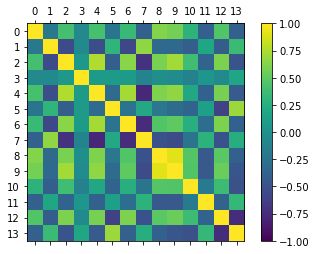

In [69]:
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(), vmin=-1, vmax=1, interpolation = 'none')
fig.colorbar(cax)
ticks =np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
#ax.set_xticks(names)
#ax.set_yticks(names)
pyplot.show()

In [71]:
array =data.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.2 
seed =7
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,test_size = validation_size, random_state =seed)

In [72]:
num_folds =10
seed =7
scoring ='neg_mean_squared_error'

In [73]:
models ={}
models['LR']= LinearRegression()
models['LASSO'] = Lasso()
models['EN']=ElasticNet()
models['KNN']=KNeighborsRegressor()
models['CART'] = DecisionTreeRegressor()
models['SVM'] = SVR()

In [75]:
results =[]
for key in models:
    kfold = KFold(n_splits =num_folds, shuffle =True, random_state =seed)
    cv_result =cross_val_score(models[key],X_train,Y_train, cv = kfold, scoring = scoring)
    results.append(cv_result)
    print('%s:%f(%f)'%(key, cv_result.mean(), cv_result.std()))

LR:-22.006009(12.188886)
LASSO:-27.105803(13.165915)
EN:-27.923014(13.156405)
KNN:-39.808936(16.507968)
CART:-26.799265(18.766486)
SVM:-67.824705(32.801530)


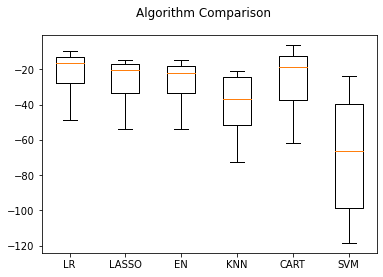

In [76]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()

In [83]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_neighbors':[1,3,5,7,9,11,13,15,17,19,21]}
model = KNeighborsRegressor()
kfold = KFold(n_splits = num_folds,shuffle =True, random_state = seed)
grid =GridSearchCV(estimator = model, param_grid= param_grid, scoring = scoring, cv=kfold)
grid_result = grid.fit(X= rescaledX, y =Y_train)
print('optimal: %s use %s'% (grid_result.best_score_, grid_result.best_params_))
cv_results = zip(grid_result.cv_results_['mean_test_score'], grid_result.cv_results_['std_test_score'],grid_result.cv_results_['std_test_score'])
for mean, std, param in cv_results:
    print('%f(%f) with %r'% (mean, std, param))

optimal: -19.497828658536584 use {'n_neighbors': 1}
-19.497829(15.769847) with 15.76984660975212
-19.977984(13.803973) with 13.803973471817649
-21.270967(14.833544) with 14.833544154278053
-21.577292(14.952592) with 14.952591857305263
-21.001075(14.701297) with 14.70129720726499
-21.490306(14.866957) with 14.86695742964106
-21.268533(14.454969) with 14.454969000406491
-21.968092(14.209894) with 14.209894040512225
-22.739880(14.492752) with 14.492752185963981
-23.506901(14.903224) with 14.903224416996835
-24.240303(15.156565) with 15.156564920987337


In [85]:
ensembles = {}
ensembles['ScaledAB'] = Pipeline([('Scaler', StandardScaler()),('AB',AdaBoostRegressor())])
ensembles['ScaledAB-KNN'] = Pipeline([('Scaler',StandardScaler()),('ABKNN',AdaBoostRegressor(base_estimator = KNeighborsRegressor(n_neighbors =3)))])
ensembles['ScaledAB-LR'] = Pipeline([('Scaler',StandardScaler()),('ABLR',AdaBoostRegressor(LinearRegression()))])
ensembles['ScaledRFR'] = Pipeline([('Scaler', StandardScaler()),('RFR',RandomForestRegressor())])
ensembles['ScaledETR'] = Pipeline([('Scaler', StandardScaler()),('ETR',ExtraTreesRegressor())])
ensembles['ScaledGBR'] = Pipeline([('Scaler', StandardScaler()),('RBR',GradientBoostingRegressor())])

In [88]:
results = []
for key in ensembles:
    kfold =KFold(n_splits = num_folds, shuffle = True, random_state= seed)
    cv_result = cross_val_score(ensembles[key], X_train, Y_train, cv= kfold,scoring = scoring)
    results.append(cv_result)
    print('%s: %f(%f)'%(key, cv_result.mean(), cv_result.std()))

ScaledAB: -14.851353(8.320538)
ScaledAB-KNN: -15.778354(11.091046)
ScaledAB-LR: -24.551893(9.445303)
ScaledRFR: -12.531904(9.315726)
ScaledETR: -9.172080(6.809804)
ScaledGBR: -10.751817(8.716079)


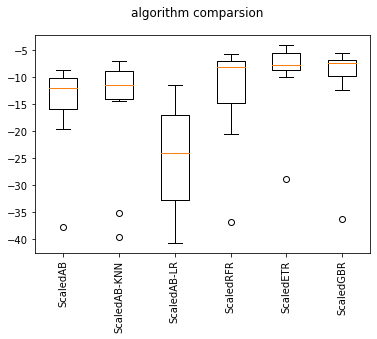

In [90]:
fig = pyplot.figure()
fig.suptitle('algorithm comparsion')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(ensembles.keys(),rotation =90)
pyplot.show()